**Import Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
      

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Sentiment Analysis (Using Textblob)**

1) Clean Data

2) Find Sentiment Polarity

In [3]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import string

In [4]:
# Step 1: Data Preparation
df=pd.read_csv("amazon_reviews_csv.csv")
df

,Index,reviewText,reviewTime,overall,reviewerName
0,0,No issues.,23-07-2014,4,ABC317
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men
...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams


In [5]:
df['Updated_Text']=df["reviewText"]
df

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text
0,0,No issues.,23-07-2014,4,ABC317,No issues.
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie,"Purchased this for my device, it worked as adv..."
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3,it works as expected. I should have sprung for...
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2,This think has worked out great.Had a diff. br...
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men,"Bought it with Retail Packaging, arrived legit..."
...,...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George,"Nothing beats class 10 SDHC, I would highly re..."
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.,"I use this card to back up some of the files, ..."
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau,I ordered it for my phone to store more music ...
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams,Bought this to use in a ContourROAM video came...


In [6]:
df.drop
df.isnull().sum()

Index           0
reviewText      0
reviewTime      0
overall         0
reviewerName    0
Updated_Text    0
dtype: int64

In [7]:
df[df['Updated_Text'].isna()]

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text


In [8]:
df['Updated_Text'].astype(str)

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
1779    Nothing beats class 10 SDHC, I would highly re...
1780    I use this card to back up some of the files, ...
1781    I ordered it for my phone to store more music ...
1782    Bought this to use in a ContourROAM video came...
1783    I needed a micro SD card with more storage for...
Name: Updated_Text, Length: 1784, dtype: object

In [9]:
def clean_data(s):
  token=word_tokenize(s)
  PUNCT_TO_REMOVE = string.punctuation
  remove_stopwords=[i for i in token if not i in (stopwords.words() and PUNCT_TO_REMOVE)]
  return (" ").join(remove_stopwords)

In [10]:
df['Updated_Text'] = df['Updated_Text'].apply(clean_data)

In [ ]:
df[['reviewText', 'Updated_Text']]

,reviewText,Updated_Text
0,No issues.,No issues
1,"Purchased this for my device, it worked as adv...",Purchased this for my device it worked as adve...
2,it works as expected. I should have sprung for...,it works as expected I should have sprung for ...
3,This think has worked out great.Had a diff. br...,This think has worked out great.Had a diff bra...
4,"Bought it with Retail Packaging, arrived legit...",Bought it with Retail Packaging arrived legit ...
...,...,...
1779,"Nothing beats class 10 SDHC, I would highly re...",Nothing beats class 10 SDHC I would highly rec...
1780,"I use this card to back up some of the files, ...",I use this card to back up some of the files t...
1781,I ordered it for my phone to store more music ...,I ordered it for my phone to store more music ...
1782,Bought this to use in a ContourROAM video came...,Bought this to use in a ContourROAM video came...


In [19]:
def sentiment(s):
    try:
        return TextBlob(str(s)).sentiment.polarity
    except:
        return 0

In [20]:
df['Sentiment'] = df['Updated_Text'].apply(sentiment)
df

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text,Sentiment
0,0,No issues.,23-07-2014,4,ABC317,No issues,0.000000
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie,Purchased this for my device it worked as adve...,0.200000
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3,it works as expected I should have sprung for ...,0.129167
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2,This think has worked out great.Had a diff bra...,0.016667
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men,Bought it with Retail Packaging arrived legit ...,0.386667
...,...,...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George,Nothing beats class 10 SDHC I would highly rec...,0.165000
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.,I use this card to back up some of the files t...,0.250000
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau,I ordered it for my phone to store more music ...,0.388889
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams,Bought this to use in a ContourROAM video came...,0.678571


In [21]:
df[['reviewText', 'Updated_Text','Sentiment']]

,reviewText,Updated_Text,Sentiment
0,No issues.,No issues,0.000000
1,"Purchased this for my device, it worked as adv...",Purchased this for my device it worked as adve...,0.200000
2,it works as expected. I should have sprung for...,it works as expected I should have sprung for ...,0.129167
3,This think has worked out great.Had a diff. br...,This think has worked out great.Had a diff bra...,0.016667
4,"Bought it with Retail Packaging, arrived legit...",Bought it with Retail Packaging arrived legit ...,0.386667
...,...,...,...
1779,"Nothing beats class 10 SDHC, I would highly re...",Nothing beats class 10 SDHC I would highly rec...,0.165000
1780,"I use this card to back up some of the files, ...",I use this card to back up some of the files t...,0.250000
1781,I ordered it for my phone to store more music ...,I ordered it for my phone to store more music ...,0.388889
1782,Bought this to use in a ContourROAM video came...,Bought this to use in a ContourROAM video came...,0.678571


In [22]:
def sentiment_binary(p):
    if(p<=0.4):
      return 0
    else:
        return 1

In [23]:
df['Sentiment'] = df['Sentiment'].apply(sentiment_binary)
df

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text,Sentiment
0,0,No issues.,23-07-2014,4,ABC317,No issues,0
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie,Purchased this for my device it worked as adve...,0
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3,it works as expected I should have sprung for ...,0
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2,This think has worked out great.Had a diff bra...,0
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men,Bought it with Retail Packaging arrived legit ...,0
...,...,...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George,Nothing beats class 10 SDHC I would highly rec...,0
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.,I use this card to back up some of the files t...,0
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau,I ordered it for my phone to store more music ...,0
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams,Bought this to use in a ContourROAM video came...,1


**Sentence Embedding**

In [ ]:
!pip install -U sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 127.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.8 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
df['embeddings'] = df['Updated_Text'].apply(model.encode)
df

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text,Sentiment,embeddings
0,0,No issues.,23-07-2014,4,ABC317,No issues,0,"[-0.05256824, -0.018859271, -0.000150413, -0.0..."
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie,Purchased this for my device it worked as adve...,0,"[-0.056560054, -0.013850468, 0.0186518, -0.030..."
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3,it works as expected I should have sprung for ...,0,"[-0.0065185823, 0.022870282, 0.0271467, -0.083..."
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2,This think has worked out great.Had a diff bra...,0,"[-0.070332296, 0.0061029876, 0.066517554, 0.03..."
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men,Bought it with Retail Packaging arrived legit ...,0,"[-0.031005528, 0.12049489, 0.025558108, 0.0137..."
...,...,...,...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George,Nothing beats class 10 SDHC I would highly rec...,0,"[-0.061430592, -0.01496582, -0.016364085, -0.0..."
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.,I use this card to back up some of the files t...,0,"[-0.06562638, 0.021622637, -0.06692754, 0.0116..."
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau,I ordered it for my phone to store more music ...,0,"[-0.010437765, -0.026680056, 0.06839559, -0.01..."
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams,Bought this to use in a ContourROAM video came...,1,"[-0.060461327, 0.033369027, -0.05018863, -0.03..."


In [ ]:
X = df['embeddings'].to_list()  # Input text samples
y = df['Sentiment'].to_list()  # Sentiment labels


# Step 2: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Sentence Embedding  (Transformer based model for word embedding)**

In [ ]:
# SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)



DecisionTreeClassifier()

In [ ]:
# Step 3: Model Evaluation
# SVM
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# Decision Tree
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)

# Print the evaluation results
print("SVM Accuracy:", svm_accuracy)
print("SVM Report:\n", svm_report)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Report:\n", rf_report)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Report:\n", dt_report)


SVM Accuracy: 0.7787114845938375
SVM Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       254
           1       0.74      0.36      0.48       103

    accuracy                           0.78       357
   macro avg       0.76      0.65      0.67       357
weighted avg       0.77      0.78      0.75       357

Random Forest Accuracy: 0.7366946778711485
Random Forest Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       254
           1       0.74      0.14      0.23       103

    accuracy                           0.74       357
   macro avg       0.74      0.56      0.54       357
weighted avg       0.74      0.74      0.66       357

Decision Tree Accuracy: 0.5826330532212886
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       254
           1       0.29      0.30      0.29       103

    

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text,Sentiment,embeddings
0,0,No issues.,23-07-2014,4,ABC317,No issues,0,"[-0.05256824, -0.018859271, -0.000150413, -0.0..."
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie,Purchased this for my device it worked as adve...,0,"[-0.056560054, -0.013850468, 0.0186518, -0.030..."
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3,it works as expected I should have sprung for ...,0,"[-0.0065185823, 0.022870282, 0.0271467, -0.083..."
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2,This think has worked out great.Had a diff bra...,0,"[-0.070332296, 0.0061029876, 0.066517554, 0.03..."
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men,Bought it with Retail Packaging arrived legit ...,0,"[-0.031005528, 0.12049489, 0.025558108, 0.0137..."
...,...,...,...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George,Nothing beats class 10 SDHC I would highly rec...,0,"[-0.061430592, -0.01496582, -0.016364085, -0.0..."
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.,I use this card to back up some of the files t...,0,"[-0.06562638, 0.021622637, -0.06692754, 0.0116..."
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau,I ordered it for my phone to store more music ...,0,"[-0.010437765, -0.026680056, 0.06839559, -0.01..."
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams,Bought this to use in a ContourROAM video came...,1,"[-0.060461327, 0.033369027, -0.05018863, -0.03..."


**BILSTM**


A Bidirectional LSTM, or biLSTM, is a sequence processing model that consists of two LSTMs: one taking the input in a forward direction, and the other in a backwards direction. BiLSTMs effectively increase the amount of information available to the network, improving the context available to the algorithm (e.g. knowing what words immediately follow and precede a word in a sentence).


In [ ]:
import numpy as np

In [ ]:
df

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text,Sentiment,embeddings
0,0,No issues.,23-07-2014,4,ABC317,No issues,0,"[-0.052568216, -0.018859204, -0.00015041188, -..."
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie,Purchased this for my device it worked as adve...,0,"[-0.056560103, -0.013850467, 0.018651811, -0.0..."
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3,it works as expected I should have sprung for ...,0,"[-0.006518647, 0.022870306, 0.027146671, -0.08..."
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2,This think has worked out great.Had a diff bra...,0,"[-0.07033235, 0.0061029866, 0.06651755, 0.0383..."
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men,Bought it with Retail Packaging arrived legit ...,0,"[-0.031005511, 0.12049484, 0.0255581, 0.013750..."
...,...,...,...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George,Nothing beats class 10 SDHC I would highly rec...,0,"[-0.061430585, -0.014965822, -0.016364075, -0...."
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.,I use this card to back up some of the files t...,0,"[-0.065626375, 0.02162266, -0.06692753, 0.0116..."
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau,I ordered it for my phone to store more music ...,0,"[-0.010437719, -0.026680142, 0.06839561, -0.01..."
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams,Bought this to use in a ContourROAM video came...,1,"[-0.06046134, 0.033369016, -0.050188642, -0.03..."


In [ ]:
X_data, y_data = np.array(df['Updated_Text']), np.array(df['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.05, random_state = 0)
print('Data Split done.')

Data Split done.


## <a id="6">Creating Word Embeddings using Word2Vec model</a>

**Word embedding** is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc. Loosely speaking, word embeddings are **vector representations** of a particular word.

**Word2Vec** was developed by Google and is one of the most popular technique to learn word embeddings using shallow neural network.
Word2Vec can create word embeddings using two methods (both involving Neural Networks): **Skip Gram** and **Common Bag Of Words (CBOW)**.



In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 1488


In [ ]:
# Defining the model input length.
input_length = 60

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## <a id="7">Tokenizing and Padding datasets</a>

**Tokenization** is a common task in **Natural Language Processing (NLP)**. It’s a fundamental step in both traditional NLP methods like **Count Vectorizer** and Advanced Deep Learning-based architectures like **Transformers**.

**Tokenization** is a way of separating a piece of text into smaller units called **tokens**. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our model e.g. LSTM, not all the sentences have the same length. We need to have the inputs with the same size, this is where the **padding** is necessary.

**Padding** is the process by which we can add padding tokens at the start or end of a sentence to increase it's length upto the required size. If required, we can also drop some words to reduce to the specified length.


* **Tokenizer:** Tokenizes the dataset into a list of tokens.
* **pad_sequences:** Pads the tokenized data to a certain length.

The **input_length** has been set to 60. This will be the length after the data is tokenized and padded.

In [ ]:
vocab_length = 2000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 2000


In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (1694, 60)
X_test.shape : (90, 60)


Defining the **Tokenizer** and fitting it on the training data. Here, we are tokenzing the data by spliting it up with the **delimiter space ' '**.

**Args in Tokenizer():**
1. **filters:** Characters to filter out from the sentences to tokenize.
2. **lower:** True/False. Whether to lowerCase the sentence or not.
3. **oov_token:** Out of Vocabulary token to put in for words which aren't in the tokenizer vocab.

Filters and lower has been turned off because we've already done those steps during the preprocessing step.

In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (2000, 100)


In [ ]:
from keras.layers import Embedding
from keras.models import Sequential                                    
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense 
from keras.layers.convolutional import Conv1D    
from keras.layers import GlobalMaxPool1D


### Model Architecture

1) **Embedding Layer:** Layer responsible for converting the tokens into their vector representation that is generated by Word2Vec model. We're using the predefined layer from Tensorflow in out model.

**Arguments -**
* **input_dim**: Size of the vocabulary.
* **output_dim**: Dimension of the dense embedding.
* **weights**: Initiazises the embedding matrix.
* **trainable**: Specifies whether the layer is trainable or not.

2) **Bidirectional:** Bidirectional wrapper for RNNs. It means the context are carried from both left to right and right to left in the wrapped RNN layer.

3) **LSTM:** **Long Short Term Memory**, its a variant of **RNN** which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN. 

**Arguments -**
* **units:** Positive integer, dimensionality of the output space.
* **dropout:**  Fraction of the units to drop for the linear transformation of the inputs.
* **return_sequence:** Whether to return the last output in the output sequence, or the full sequence.

4) **Conv1D:** This layer creates a convolution kernel that is convolved with the layer input over a single dimension to produce a tensor of outputs.

**Arguments -**
* **filters:** The dimensionality of the output space (i.e. the number of output filters in the convolution).
* **kernel_size:** Specifies the length of the 1D convolution window.
* **activation:** Specifies the activation function to use. 

5) **GlobalMaxPool1D:** Downsamples the input representation by taking the maximum value over the different dimensions.


6) **Dense:** Dense layer adds a fully connected layer in the model. The argument passed specifies the number of nodes in that layer.

The last dense layer has the activation **"Sigmoid"**, which is used to transform the input to a number between 0 and 1. Sigmoid activations are generally used when we have 2 categories to output in.

In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           200000    
                                                                 
 bidirectional (Bidirectiona  (None, 60, 200)          160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 200)          240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
2/2 [==============================] - 27s 8s/step - loss: 0.6502 - accuracy: 0.7192 - val_loss: 0.6097 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 2/12
2/2 [==============================] - 12s 3s/step - loss: 0.5839 - accuracy: 0.7205 - val_loss: 0.6059 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 3/12
2/2 [==============================] - 11s 3s/step - loss: 0.5778 - accuracy: 0.7205 - val_loss: 0.5992 - val_accuracy: 0.6941 - lr: 0.0010
Epoch 4/12
2/2 [==============================] - 11s 5s/step - loss: 0.5704 - accuracy: 0.7205 - val_loss: 0.5843 - val_accuracy: 0.6941 - lr: 0.0010
Epoch 5/12
2/2 [==============================] - 9s 3s/step - loss: 0.5570 - accuracy: 0.7198 - val_loss: 0.5722 - val_accuracy: 0.6882 - lr: 0.0010
Epoch 6/12
2/2 [==============================] - 11s 3s/step - loss: 0.5435 - accuracy: 0.7218 - val_loss: 0.5580 - val_accuracy: 0.7176 - lr: 0.0010
Epoch 7/12
2/2 [==============================] - 11s 5s/step - loss: 0.5278 - accuracy: 0.7218

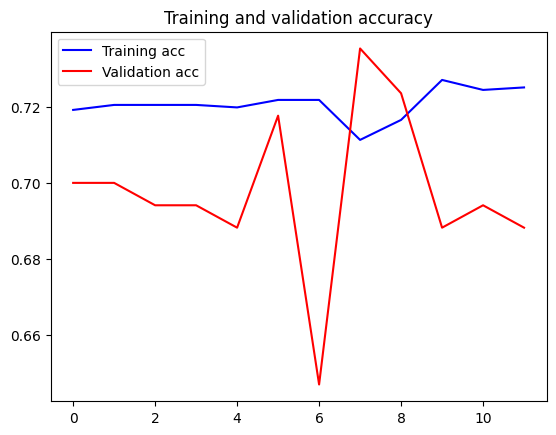

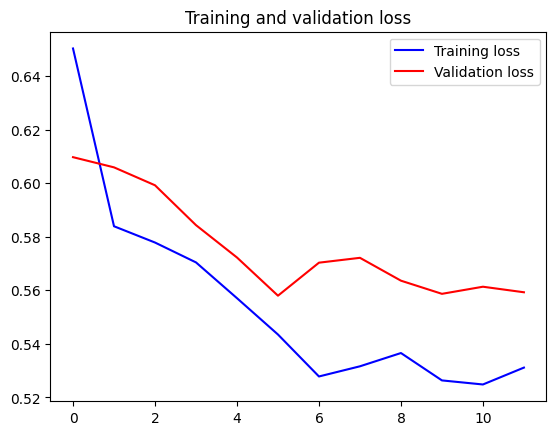

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

3/3 [==============================] - 2s 83ms/step


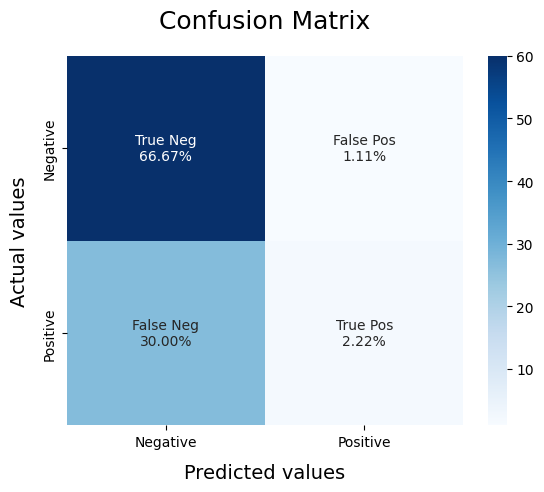

In [ ]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [ ]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81        61
           1       0.67      0.07      0.12        29

    accuracy                           0.69        90
   macro avg       0.68      0.53      0.47        90
weighted avg       0.68      0.69      0.59        90



In [ ]:
bilstm_accuracy = accuracy_score(y_test, y_pred)
print(bilstm_accuracy)

0.6888888888888889


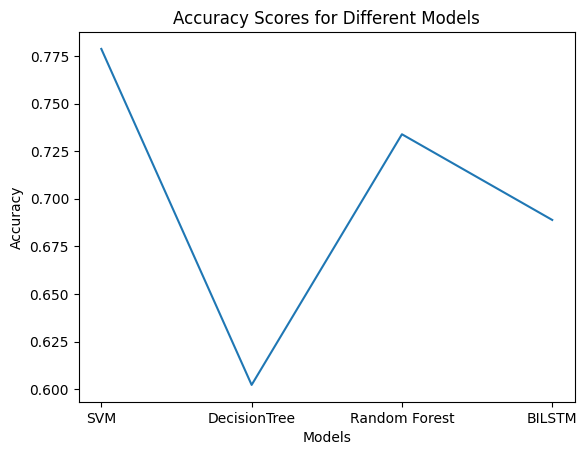

In [ ]:
import matplotlib.pyplot as plt

model_names = ['SVM',  'DecisionTree','Random Forest','BILSTM']
accuracy_scores = [svm_accuracy,dt_accuracy,rf_accuracy,bilstm_accuracy]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.plot(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

**BERT-based word Embedding**

NLP models such as LSTMs or CNNs require inputs in the form of numerical vectors, and this typically means translating features like the vocabulary and parts of speech into numerical representations. In the past, words have been represented either as uniquely indexed values (one-hot encoding), or more helpfully as neural word embeddings where vocabulary words are matched against the fixed-length feature embeddings that result from models like Word2Vec or Fasttext. BERT offers an advantage over models like Word2Vec, because while each word has a fixed representation under Word2Vec regardless of the context within which the word appears, BERT produces word representations that are dynamically informed by the words around them. 

In [13]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.6 MB/s eta 0:00:00


In [14]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt


# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [15]:
token_var = ""
def token_text(text):
  marked_text = "[CLS] " + text + " [SEP]"

  # Tokenize our sentence with the BERT tokenizer.
  tokenized_text = tokenizer.tokenize(marked_text)

  # Print out the tokens.
 # print (tokenized_text)

  # Display the words with their indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  for tup in zip(tokenized_text, indexed_tokens):
      print('{:<12} {:>6,}'.format(tup[0], tup[1])) 
  segments_ids = [1] * len(tokenized_text)

  print (segments_ids)

  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])
  # Load pre-trained model (weights)
  model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
  model.eval()
  with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

  

In [16]:
token_text(df['Updated_Text'][0])

[CLS]           101
no            2,053
issues        3,314
[SEP]           102
[1, 1, 1, 1]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
df

,Index,reviewText,reviewTime,overall,reviewerName,Updated_Text
0,0,No issues.,23-07-2014,4,ABC317,No issues
1,1,"Purchased this for my device, it worked as adv...",25-10-2013,5,0mie,Purchased this for my device it worked as adve...
2,2,it works as expected. I should have sprung for...,23-12-2012,4,1K3,it works as expected I should have sprung for ...
3,3,This think has worked out great.Had a diff. br...,21-11-2013,5,1m2,This think has worked out great.Had a diff bra...
4,4,"Bought it with Retail Packaging, arrived legit...",13-07-2013,5,2&amp;1/2Men,Bought it with Retail Packaging arrived legit ...
...,...,...,...,...,...,...
1779,1779,"Nothing beats class 10 SDHC, I would highly re...",02-10-2013,5,George,Nothing beats class 10 SDHC I would highly rec...
1780,1780,"I use this card to back up some of the files, ...",04-07-2014,5,George H.,I use this card to back up some of the files t...
1781,1781,I ordered it for my phone to store more music ...,01-07-2014,5,George J. Vernau,I ordered it for my phone to store more music ...
1782,1782,Bought this to use in a ContourROAM video came...,06-05-2013,5,George M. Williams,Bought this to use in a ContourROAM video came...


In [24]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load and preprocess the dataset
dataset = ...  # Load your financial_news dataset here
sentences = df['Updated_Text'].tolist()
sentiment_labels = df['Sentiment'].tolist()

# Define the parameters
max_seq_length = 100  # Maximum sequence length
num_classes = 3  # Number of sentiment classes (positive, negative, neutral)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the sentences
input_ids = []
attention_masks = []

for sentence in sentences:
    encoded_dict = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=max_seq_length,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)
sentiment_labels = tf.one_hot(sentiment_labels, depth=num_classes)

# Split the dataset into training and testing sets
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(input_ids) * split_ratio)

train_input_ids = input_ids[:split_index]
train_attention_masks = attention_masks[:split_index]
train_labels = sentiment_labels[:split_index]
test_input_ids = input_ids[split_index:]
test_attention_masks = attention_masks[split_index:]
test_labels = sentiment_labels[split_index:]

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Freeze the BERT layers
bert_model.trainable = False

# Define the model architecture
input_ids_layer = Input(shape=(max_seq_length,), dtype=tf.int32)
attention_masks_layer = Input(shape=(max_seq_length,), dtype=tf.int32)
bert_output = bert_model(input_ids_layer, attention_mask=attention_masks_layer)[0]
pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(bert_output)
output_layer = Dense(units=num_classes, activation='softmax')(pooling_layer)

model = Model(inputs=[input_ids_layer, attention_masks_layer], outputs=output_layer)
model.summary()

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    [train_input_ids, train_attention_masks],
    train_labels,
    epochs=3,
    batch_size=32,
    validation_data=([test_input_ids, test_attention_masks], test_labels)
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

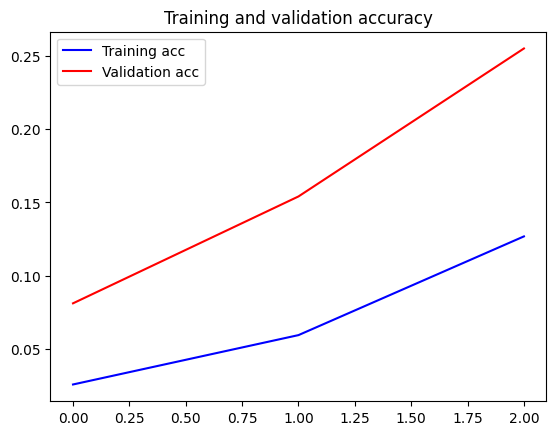

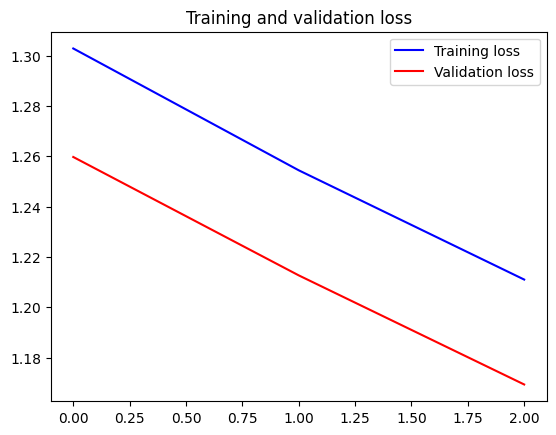

In [25]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()